In [1]:
import pandas as pd
import numpy as np
import requests
import json
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix

In [2]:
challengers = pd.read_csv('participants.csv')
challengers = challengers.loc[challengers['gameDuration'] > 1000]
bronzes = pd.read_csv('bronzeParticipants.csv')
bronzes = bronzes.loc[bronzes['gameDuration'] > 1000]
golds = pd.read_csv('goldParticipants.csv')
golds = golds.loc[golds['gameDuration'] > 1000]
silver = pd.read_csv('silverParticipants.csv')
silver = silver.loc[silver['gameDuration'] > 1000]
iron = pd.read_csv('ironParticipants.csv')
iron = iron.loc[iron['gameDuration'] > 1000]
plat = pd.read_csv('platParticipants.csv')
plat = plat.loc[plat['gameDuration'] > 1000]
diamond = pd.read_csv('diamondParticipants.csv')
diamond = diamond.loc[diamond['gameDuration'] > 1000]

C:\Users\zenet\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (55,56) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\zenet\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (55,56) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
frames_1 = [iron, silver, bronzes]
bronzes = pd.concat(frames_1)
bronzes = bronzes.sample(frac=1)

In [4]:
frames_2 = [golds, plat, diamond]
golds = pd.concat(frames_2)
golds = golds.sample(frac=1)

In [5]:
frames_3 = [challengers]
challengers = pd.concat(frames_3)
challengers = challengers.sample(frac=1)

In [6]:
bronzes = bronzes.replace(True, 1).replace(False, 0)
golds = golds.replace(True, 1).replace(False, 0)
challengers = challengers.replace(True, 1).replace(False, 0)

In [7]:
bronzes.drop_duplicates(inplace=True)
golds.drop_duplicates(inplace=True)
challengers.drop_duplicates(inplace=True)

In [8]:
bronzes['played'] = 1
golds['played'] = 1
challengers['played'] = 1

In [9]:
bronzes.columns

Index(['participantId', 'win', 'item0', 'item1', 'item2', 'item3', 'item4',
       'item5', 'item6', 'kills',
       ...
       'gameId', 'gameDuration', 'lane', 'teamId', 'championId', 'spell1Id',
       'spell2Id', 'firstInhibitorKill', 'firstInhibitorAssist', 'played'],
      dtype='object', length=112)

In [10]:
attr = ['totalHeal', 'totalMinionsKilled', 'neutralMinionsKilled', 'gameDuration', 'deaths', 'kills', 'visionScore', 'assists', 'goldEarned', 'inhibitorKills', 'totalDamageDealtToChampions', 'longestTimeSpentLiving', 'wardsKilled']
attr_plyd = ['magicDamageDealtToChampions', 'physicalDamageDealtToChampions', 'trueDamageDealtToChampions', 'totalHeal', 'totalDamageTaken', 'inhibitorKills', 'totalDamageDealtToChampions', 'magicalDamageTaken', 'longestTimeSpentLiving', 'wardsKilled', 'physicalDamageTaken', 'totalMinionsKilled', 'neutralMinionsKilled', 'totalTimeCrowdControlDealt', 'gameDuration', 'deaths', 'kills', 'visionScore', 'assists', 'goldEarned', 'played']

In [11]:
f = dict.fromkeys(bronzes[attr_plyd], 'mean')
f.update(
    dict.fromkeys(['played'], 'sum'))

In [12]:
bronzes_group = bronzes.groupby(['participantId'])[attr_plyd].agg(f)
golds_group = golds.groupby(['participantId'])[attr_plyd].agg(f)
challengers_group = challengers.groupby(['participantId'])[attr_plyd].agg(f)

In [13]:
bronzes_group = bronzes_group.loc[bronzes_group['played'] > 3]
golds_group = golds_group.loc[golds_group['played'] > 3]
challengers_group = challengers_group.loc[challengers_group['played'] > 3]

In [14]:
challengers_group['wardsKilled'] = challengers_group['wardsKilled'].fillna(0)
challengers_group

,magicDamageDealtToChampions,physicalDamageDealtToChampions,trueDamageDealtToChampions,totalHeal,totalDamageTaken,inhibitorKills,totalDamageDealtToChampions,magicalDamageTaken,longestTimeSpentLiving,wardsKilled,...,totalMinionsKilled,neutralMinionsKilled,totalTimeCrowdControlDealt,gameDuration,deaths,kills,visionScore,assists,goldEarned,played
participantId,,,,,,,,,,,,,,,,,,,,,
--Ju_A1b8ZlsnI5b8qovR9jFOOtJ4Ae1xmfIeX0V_ZBjqCsNQ3IshLwd,6980.980198,7475.099010,1031.742574,4718.524752,23549.495050,0.049505,15488.603960,7010.980198,533.029703,3.009901,...,163.504950,19.217822,237.712871,1603.435644,5.930693,4.346535,24.841584,6.386139,10576.534653,101
--bUxb3LAeED-fpHRWdWa-C1WRaCqP5MJV6wy5h65oSJ,14105.219512,2685.634146,592.634146,9967.207317,23664.414634,0.121951,17384.207317,8543.036585,572.829268,2.829268,...,147.621951,20.475610,330.292683,1582.170732,5.463415,5.939024,25.280488,7.353659,10654.487805,82
-0Lkl8D8ElJldGfNYcUnVmkD0uGaFTfj9gfwJ5f50HV_guk,4378.863636,13311.536364,1118.081818,3432.800000,17964.500000,0.290909,18809.309091,6595.400000,591.645455,4.323810,...,180.372727,14.563636,129.654545,1642.900000,6.018182,6.872727,24.127273,7.490909,12089.209091,110
-0QvxtwHrJvG4nwAeZMO6yLPb-tUpSWVFrQ6OP-FyCcbs2E,5298.535354,12717.303030,792.868687,4831.474747,19177.595960,0.191919,18809.434343,6306.868687,561.585859,6.222222,...,205.313131,12.858586,155.424242,1650.030303,5.161616,6.161616,27.878788,7.333333,12313.272727,99
-0q9CShTijqQFgPFXUabkwgN4SEYXlZhS_Zj8QTUxVQ,16516.897436,1574.000000,438.153846,2030.820513,14453.692308,0.102564,18529.666667,5244.923077,665.025641,3.769231,...,156.461538,14.384615,202.615385,1625.512821,4.948718,5.076923,25.564103,8.435897,10754.538462,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zmk6Fd82FgJIZeWFdxIzbTw4nLrRcbIzrAYcaMoTQcVk8g,2115.333333,13535.266667,732.933333,2083.466667,14516.400000,0.400000,16384.466667,4704.400000,478.800000,4.200000,...,164.333333,14.266667,62.666667,1557.133333,4.866667,7.000000,21.466667,7.333333,11446.533333,15
znJrcvyF7iCJ5EQd-NYOxbOIiH8IJ3Z7ckM_UGTKup1-sYw,5703.166667,6793.333333,1617.500000,2589.166667,15697.500000,0.000000,14114.666667,6419.333333,460.333333,2.666667,...,56.666667,4.333333,283.833333,1548.333333,7.000000,4.333333,37.166667,13.666667,8978.166667,6
znqUOlGVV0ouySxNrxJ6TGnTC-wGtx_ARiFcXsAQR_O2J1k,5003.444444,10788.555556,51.888889,2225.500000,22786.333333,0.055556,15844.611111,7232.055556,573.277778,1.222222,...,144.833333,1.444444,487.777778,1614.555556,5.611111,4.388889,14.444444,6.111111,9323.388889,18


In [15]:
golds_group['wardsKilled'] = golds_group['wardsKilled'].fillna(0)
golds_group

,magicDamageDealtToChampions,physicalDamageDealtToChampions,trueDamageDealtToChampions,totalHeal,totalDamageTaken,inhibitorKills,totalDamageDealtToChampions,magicalDamageTaken,longestTimeSpentLiving,wardsKilled,...,totalMinionsKilled,neutralMinionsKilled,totalTimeCrowdControlDealt,gameDuration,deaths,kills,visionScore,assists,goldEarned,played
participantId,,,,,,,,,,,,,,,,,,,,,
--PHF31hgpC3YNiXSWHgrmeEUwWwtF-XQTnmK_jpztS2Rgk,5832.263158,11900.447368,1008.526316,6947.394737,21068.473684,0.368421,18741.921053,7305.131579,589.210526,2.837838,...,114.921053,57.894737,178.526316,1708.578947,5.710526,7.342105,21.684211,9.026316,11733.447368,38
-06zAh6cA_jW7uJ3z2VbrQLBdGO1fUL631dmF3kXdKynehk,1592.750000,24475.000000,1844.750000,4391.250000,18131.750000,1.500000,27913.500000,6650.750000,480.250000,6.500000,...,179.500000,14.000000,105.500000,1763.750000,5.000000,9.750000,36.250000,10.750000,14096.000000,4
-0ScFmyMljw3v5XBMnUeIyuIAUAb2OLLZtWmdB3w3gqeS6A,9000.636364,1770.272727,455.727273,7611.363636,12667.727273,0.090909,11227.363636,5143.909091,593.545455,3.454545,...,14.545455,0.727273,171.363636,1729.090909,5.363636,2.818182,42.363636,15.090909,8351.545455,11
-2QIden8EaJ-ZFLLijgQewrfqXGorW6jyRVQJ6jWtPD8nQ,3882.750000,6481.500000,891.250000,4967.500000,15346.500000,0.000000,11256.750000,4665.000000,594.500000,1.750000,...,93.000000,43.500000,207.250000,1460.750000,4.750000,4.000000,13.500000,4.000000,8860.500000,4
-2rv05yAR97qU7lf2cmcY_FSaaUMrUMRJS7xBdjyA1ZDwVU,6950.250000,1307.250000,1529.250000,3575.500000,15188.000000,0.000000,9787.500000,4319.750000,706.500000,5.750000,...,66.000000,1.000000,128.500000,1808.250000,5.250000,2.250000,45.250000,11.500000,8735.750000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zu9GWTy4WwPlt1gpgJldYvH-_kjKDekVRueys5wFugAg-jo,8762.153846,7404.846154,1293.615385,5893.076923,24750.461538,0.076923,17461.461538,13903.384615,290.384615,3.000000,...,44.538462,0.307692,180.153846,1369.384615,7.153846,9.230769,5.000000,15.923077,13315.153846,13
zuOuyE-1WaQA3nJgoqAqXYGHSZZSDkJQfhPk28DWOgeI7gI,14673.200000,1001.400000,1011.200000,2421.800000,18341.400000,0.600000,16686.000000,4717.600000,521.000000,2.400000,...,187.800000,4.400000,177.600000,1871.200000,5.000000,4.400000,27.400000,8.800000,11706.800000,5
zv25akoraBj7typ8b4M8U1SlqtELrBmJOJAzQ-TjNFKzVki4lnpIwviA,14307.800000,1692.600000,394.800000,1834.000000,17928.000000,0.000000,16396.000000,4804.600000,611.000000,0.600000,...,139.200000,2.000000,94.600000,1751.400000,4.200000,5.200000,13.800000,7.600000,10433.800000,5


In [16]:
bronzes_group['wardsKilled'] = bronzes_group['wardsKilled'].fillna(0)
bronzes_group

,magicDamageDealtToChampions,physicalDamageDealtToChampions,trueDamageDealtToChampions,totalHeal,totalDamageTaken,inhibitorKills,totalDamageDealtToChampions,magicalDamageTaken,longestTimeSpentLiving,wardsKilled,...,totalMinionsKilled,neutralMinionsKilled,totalTimeCrowdControlDealt,gameDuration,deaths,kills,visionScore,assists,goldEarned,played
participantId,,,,,,,,,,,,,,,,,,,,,
--FbpA7gTbekOLOCUZoqhS1Bv5EjMRf3uTuvmqfTHZbAgEw,6996.000000,1280.500000,185.750000,5864.250000,15919.000000,0.000000,8462.500000,4607.250000,678.000000,1.250000,...,62.750000,44.000000,265.250000,1546.000000,3.750000,5.000000,11.750000,5.750000,8473.750000,4
-0Q-_o74AnxzeXU2lFnJSe96hZRs54C19UGu7dV5jcVZ-pALTUsHHd02,4522.000000,12052.000000,1071.750000,4131.250000,24672.750000,0.250000,17646.500000,8747.250000,538.500000,1.000000,...,134.250000,2.000000,106.500000,1859.500000,8.500000,5.750000,19.000000,5.250000,10342.250000,4
-1H4fHNvmGKv4J0c2zmgLBYh2vUs0aqjFU5M7NJipsIVpZk,8135.388889,4224.194444,477.805556,3996.750000,18498.916667,0.111111,12838.055556,6653.361111,530.111111,2.653846,...,76.222222,17.166667,179.222222,1605.166667,6.500000,5.805556,22.111111,10.277778,10536.944444,36
-3cNs-QB9rKoDaJNMKwvX4-KU5u8SGQ6b-jAIr9nhyFHZmsbTdSS5ce2,4006.000000,8174.500000,1141.750000,11842.000000,32800.500000,0.250000,13323.000000,10909.000000,857.000000,1.000000,...,99.750000,60.500000,199.500000,2065.250000,6.750000,4.250000,18.500000,4.250000,11059.500000,4
-698_JdygJ7AlHg6pMpUpAkHKp5o6YnYredy0fj7Otk,3848.800000,13710.800000,2667.200000,2710.000000,22308.000000,0.000000,20227.400000,8642.800000,627.400000,0.600000,...,149.800000,15.400000,401.400000,1907.000000,8.600000,7.200000,12.400000,6.000000,11897.800000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
znMyMqTTtvNQzAMBnq_dFuGM9NdSVKORInRbRnOqHZc0YlcUOI_5SU67,13171.166667,7650.000000,1211.166667,12688.833333,31718.833333,0.166667,22033.000000,10058.666667,685.500000,1.000000,...,51.333333,121.833333,205.333333,2153.166667,7.166667,12.500000,16.000000,7.000000,14171.833333,6
zoYr-x3WZWBmY-3YDhgpoLtAaJSeVmeBqs3BqlvwrKtxCwP6cikTTRKC,2020.500000,6498.750000,1410.000000,8471.500000,17116.500000,0.000000,9930.000000,4461.500000,412.250000,0.500000,...,47.500000,52.750000,178.750000,1374.750000,4.500000,4.000000,12.000000,5.750000,7413.750000,4
zuuVlfoRJ89LX-vEcP1ti1uYEyUExUTVXilTSxOAFx2PVnM,7856.714286,16568.285714,309.714286,9729.142857,36704.285714,0.142857,24735.142857,17932.000000,335.142857,0.000000,...,86.857143,10.000000,199.142857,1564.857143,9.142857,8.857143,7.000000,8.285714,15038.714286,7


In [17]:
bronzes_group['tier'] = 1
golds_group['tier'] = 2
challengers_group['tier'] = 3

In [18]:
frames = [bronzes_group,golds_group,challengers_group]
df = pd.concat(frames)
df = df.sample(frac=1)
df

,magicDamageDealtToChampions,physicalDamageDealtToChampions,trueDamageDealtToChampions,totalHeal,totalDamageTaken,inhibitorKills,totalDamageDealtToChampions,magicalDamageTaken,longestTimeSpentLiving,wardsKilled,...,neutralMinionsKilled,totalTimeCrowdControlDealt,gameDuration,deaths,kills,visionScore,assists,goldEarned,played,tier
participantId,,,,,,,,,,,,,,,,,,,,,
ck37NPPcxBka0VaqoFK77d2mpXqFp_bL_isl-dY6isB-JH8,5402.054054,5869.810811,1004.864865,19075.378378,32075.783784,0.054054,12277.540541,8377.162162,604.108108,5.081081,...,115.945946,282.945946,1732.135135,5.216216,5.027027,28.135135,6.945946,10511.837838,37,2
jpO6jJmSiKl7WF4Q9fehRPXaF2am1HD2pXja4XGKoNT5bbA,10014.500000,10306.250000,2096.750000,5700.250000,22685.500000,0.250000,22418.500000,5616.000000,646.250000,6.500000,...,61.250000,214.250000,1877.250000,6.750000,8.000000,35.000000,11.250000,12451.500000,4,2
ZScNANrzTqKB9oHbyH_sqzgg8igCpeqJxj1C33GBBoLMP-Y,7051.000000,3686.625000,691.250000,9938.500000,28116.500000,0.125000,11429.750000,8103.625000,554.250000,1.125000,...,72.125000,378.625000,1842.500000,8.000000,4.250000,21.625000,11.125000,9451.875000,8,1
Inq64fHurIS8DnJEGYhR3FRPZw4W9ZF4q03lXGnV8sTYnL9xc_eZryc9,3515.857143,13975.000000,2475.285714,4776.428571,25423.142857,0.571429,19967.000000,8407.000000,645.285714,0.714286,...,20.428571,84.428571,1980.142857,7.571429,8.000000,19.285714,6.142857,12567.142857,7,1
b0tkA1DaLQWlDqEQgrY5Z1hiK8cP8YZS4HGZvGQwTPNpJiw,8234.666667,2693.916667,496.138889,3626.166667,17329.722222,0.055556,11425.277778,6027.166667,619.111111,1.472222,...,18.305556,146.333333,1765.111111,6.305556,2.888889,27.277778,6.944444,8636.055556,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bzuM7iot_FZ5g-LSTjZY8uaLWTGkeAMT_LKs0UUT9fDwZQh32Ye8DJ8j,5449.333333,15421.333333,2278.000000,6216.833333,28072.333333,0.166667,23149.333333,6809.833333,623.166667,1.500000,...,19.500000,123.000000,1747.666667,7.000000,7.000000,13.000000,5.833333,12889.500000,6,3
NoBvvKgNkqgPauqtFytn-PZqeiW2SeQq9TLW8yt3JaqZZKM_7NxnWpyI,4131.000000,12701.500000,1571.250000,5996.750000,29950.750000,0.000000,18404.500000,7424.000000,673.750000,1.750000,...,26.750000,139.500000,2098.750000,9.750000,5.250000,16.250000,7.000000,11451.500000,4,1
EG5SBPu5XdxM6_f2773CqTfkNLRjVLH97XqKIEtOUmdmEk0,4739.491525,1743.457627,511.677966,2857.898305,15680.288136,0.033898,6995.271186,6134.237288,546.322034,7.305085,...,1.084746,134.491525,1655.491525,5.457627,1.864407,61.949153,13.966102,7671.423729,59,3


In [19]:
Xtrain, Xtest, y_train, y_test = train_test_split(df[attr], df['tier'], test_size=0.2)

In [20]:
# Define the scaler 
ss = StandardScaler().fit(Xtrain)

# Scale the train set
X_train = ss.transform(Xtrain)

# Scale the test set
X_test = ss.transform(Xtest)

In [21]:
from sklearn import metrics
clf=RandomForestClassifier(n_estimators=700, max_features='log2')
classifier = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7534965034965035


In [22]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=2)
model2.fit(X_train,y_train)
predicted2= model2.predict(X_test)
print("Predicted Value:", predicted2)
print("Accuracy:",metrics.accuracy_score(y_test, predicted2))

Predicted Value: [1 3 2 ... 3 2 1]
Accuracy: 0.6555944055944056


In [23]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
predicted= model.predict(X_test)
print("Predicted Value:", predicted)
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Predicted Value: [1 3 2 ... 3 2 1]
Accuracy: 0.6456876456876457


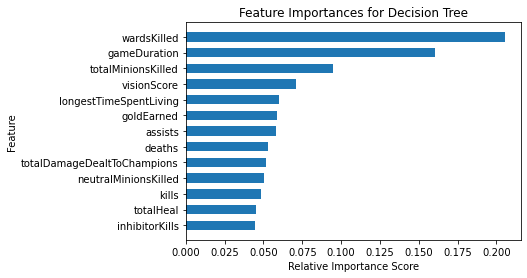

In [24]:
rf_feature_importances = clf.feature_importances_
rf_feature_names, rf_feature_scores = zip(*sorted(zip(attr, rf_feature_importances), 
                                                          key=lambda x: x[1]))
y_position = list(range(len(rf_feature_names)))
plt.barh(y_position, rf_feature_scores, height=0.6, align='center')
plt.yticks(y_position , rf_feature_names)
plt.xlabel('Relative Importance Score')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree')

[[498  98   3]
 [ 89 436  78]
 [  8 147 359]]


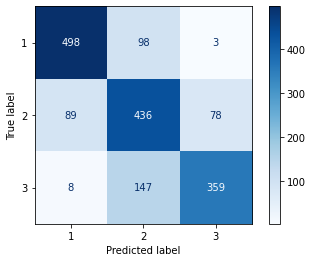

In [25]:
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=['1','2','3'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)

print(disp.confusion_matrix)